<h1 style="font-family: Arial; font-weight: 900; color: magenta; text-align: center;">ENSEMBLE LEARNING</h1><br>

<br/><div style="font-family: Arial; color: darkblue; font-size: 14px; font-weight: 600"><a id="toc"></a>
In this part 7:
    <p style="margin: 0 0 0 2rem; font-size: 16px; font-weight: 800">[1. Combining classifiers with majority vote](#1)</p>
        <p style="margin: 0 0 0 4rem">[1a. A simple majority vote classifier](#1a)</p>
        <p style="margin: 0 0 0 4rem">[1b. Evaluating and tuning the ensemble classifier](#1b)</p><br/>
    <p style="margin: 0 0 0 2rem; font-size: 16px; font-weight: 800">[2. Ensemble learning with bagging](#2)</p><br/>
    <p style="margin: 0 0 0 2rem; font-size: 16px; font-weight: 800">[3. Adaptive boosting (AdaBoost)](#3)</p>
        <p style="margin: 0 0 0 4rem">[3a. The AdaBoost's strategy](#3a)</p>
        <p style="margin: 0 0 0 4rem">[3b. Applying AdaBoost with scikit-learn](#3b)</p><br/>
    <p style="margin: 0 0 0 2rem; font-size: 16px; font-weight: 800">[4. Gradient Boosting](#4)</p>
        <p style="margin: 0 0 0 4rem">[4a. The Gradient Boosting's strategy](#4a)</p>
        <p style="margin: 0 0 0 4rem">[4b. Applying Gradient Boosting with scikit-learn](#4b)</p>
        <p style="margin: 0 0 0 4rem">[4c. scikit-learn's HistGradientBoostingClassifier](#4c)</p><br/>
    <p style="margin: 0 0 0 2rem; font-size: 16px; font-weight: 800">[Appendix - AdaBoost and Gradient Boosting revisited](#Appendix)</p></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# The datasets we will use
from sklearn.datasets import load_iris
df_wine = pd.read_csv('wine.data', header=None)
from sklearn.datasets import make_moons

# Beautify the code results by using colors
from colorama import Fore, Back, Style
# define some strings for cleaner codes
BB = Fore.BLUE + Style.BRIGHT
MB = Fore.MAGENTA + Style.BRIGHT
GB = Fore.GREEN + Style.BRIGHT

# Beautify figures by rendering them in SVG quality instead of JPG
# (don't use this if you prefer lightweight notebooks)
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats("svg")
# we'll use the "cyberpunk" color map
cmap = plt.get_cmap("cool")

<a id="1"></a><br><br><br><div style="font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    <h4 style="margin: 0 0 .5rem 2rem; font-size: 18px; font-weight: 800"><font color='darkpink'>1. COMBINING CLASSIFIERS WITH MAJORITY VOTE</font></h4>
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>1a. A simple majority vote classifier</font><a id="1a"></a></p>$\quad$
        We call <font color='darkpink'>ensemble learning method</font> any machine learning method that combines multiple models to achieve a better predictive performance than any individual model alone. These individual models are called the <font color='darkpink'>base learners</font>, or the <font color='darkpink'>weak learners</font>.<br>$\quad$
        We have already seen an archetypal example of an ensemble learning method : random forests (see part $3$, "4d. Random forests"). The main justification behind ensemble learning methods is, of course, the law of large numbers (or, more precisely, the Condorcet Jury Theorem) : if we train enough independent predictors, each with better accuracy than random guessing, we can get as high an accuracy as needed by simply predicting that the class an element belongs to is the class predicted by the majority of predictors.<br>$\quad$
        In this part, we will try to improve on this convergence. Our main idea will be to give more weight to our better predictors. More precisely, if there are $k$ classes and we use $p$ predictors $P_1$,..., $P_p$, then any element $x$ will be predicted to be of class<br><font color = darkpink>
        $$\hat{y} \;=\; \underset{i=1,\cdots,k}{\text{argmax}}\;\sum_{q=1}^{p}\,w_q \, 1_{P_q(x)=i} \qquad (1)$$</font>
    where $1_{P_q(x)=i}$ equals $1$ if the $q$-th classifier predicts that $x$ belongs to the class $i$, and $0$ otherwise, and where $w_1$,...,$w_p$ are the weights associated with our collection of predictors.<br>$\quad$
        Some classifiers return the probabilities that an element belongs to one class or another (see eg part 3, "2b. The logistic regression strategy"). If we only use this type of classifiers, and if we denote by $p_{qi}(x)$ the probability that $x$ belongs to the class $i$ according to the classifier $P_q$, then we get a more precise version of $(1)$ :<br><font color = darkpink>
        $$\hat{y} \;=\; \underset{i=1,\cdots,k}{\text{argmax}}\;\sum_{q=1}^{p}\,w_q \, p_{qi}(x) \qquad (2)$$

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        The author proposes to implement both methods and more in his code for a <font color='green'>MajorityVoteClassifier</font> (see next cell). However, "a more sophisticated version of this majority vote classifier [...] is available in <font color='green'>scikit-learn</font>, as <font color='green'>sklearn.ensemble.VotingClassifier</font>", so I will use the latter instead.<br>$\quad$
        <font color='green'>VotingClassifier(estimators, voting='hard', weights=None, n_jobs=None)</font> uses the arguments : <font color='green'>estimators</font> (a list of tuples composed of a name (string) and of the corresponding estimator - we can use any name we want for our estimators -); <font color='green'>voting='hard'</font> (<font color='green'>'hard'</font> is for using the class labels predictions while <font color='green'>'soft'</font> is for using the predicted probabilities, "which is recommended for an ensemble of well-calibrated classifiers"); <font color='green'>weights=None</font> (specifies the sequence of weights (float or int) to weigh the occurrences of predicted class labels (hard voting) or class probabilities (soft voting); <font color='green'>None</font> means using uniform weights); and <font color='green'>n_jobs=None</font> (specifies the number of processors to use; <font color='green'>None</font> means $1$, and $-1$ would mean all).<br>$\quad$
        Some methods associated with <font color='green'>VotingClassifier</font> :<br>
    * <font color='green'>fit(X,y)</font> : trains each individual estimator in the ensemble, independently from one another, so their predictions can later be combined<br>
    * <font color='green'>predict(X)</font> : returns the predicted class labels for each instance of X<br>
    * <font color='green'>predict_proba(X)</font> : returns the predicted probabilities of possible outcomes for each instance of X<br>
    * <font color='green'>score(X, y)</font> : returns the mean accuracy<br>
    * <font color='green'>get_params(deep=True)</font> : as usual, returns the parameters given in the ensemble constructor as well as the parameters of all nested estimators within the ensemble (when <font color='green'>deep=True</font>)<br>
    * <font color='green'>transform(X)</font> : returns class labels or probabilities for X for each estimator<br>
    * <font color='green'>fit_transform(X)</font> : equivalent to <font color='green'>fit(X,y)</font> followed by <font color='green'>transform(X)</font>

In [2]:
from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import _name_estimators

class MajorityVoteClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, classifiers, vote='classlabel', weights=None):
        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):
        if self.vote not in ('probability', 'classlabel'):
            raise ValueError(f"vote must be 'probability' or 'classlabel'; got (vote={self.vote})")
        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError(f"Number of classifiers and weights must be equal"
                f"; got {len(self.weights)} weights, {len(self.classifiers)} classifiers")
        # Use LabelEncoder to ensure class labels start with 0, which is important for np.argmax calls
        # in self.predict
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self

    def predict(self, X):
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else: # 'classlabel' vote; collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X) for clf in self.classifiers_]).T
            maj_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x, weights=self.weights)),
                                            axis=1, arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote

    def predict_proba(self, X):
        probas = np.asarray([clf.predict_proba(X) for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba

    def get_params(self, deep=True):
        if not deep:
            return super().get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in self.named_classifiers.items():
                for key, value in step.get_params(deep=True).items():
                    out[f'{name}__{key}'] = value
            return out

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        We are going to try <font color='green'>sklearn.ensemble.VotingClassifier</font>. But first, let's build the dataset that we will use :<br>

In [3]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# we load the iris dataset directly from scikit-learn
iris = load_iris()
# extracts a portion of the dataset : selects the features from index 1 and 2 (petal length and
# petal width) and ignores the first 50 instances (corresponding to the 'setosa' class)
X, y = iris.data[50:, [1, 2]], iris.target[50:]
# converts the class labels (species names) into numerical labels, a necessary step for some machine
# learning algorithms that can only handle numerical inputs
le = LabelEncoder()
y = le.fit_transform(y)
# randomly splits the data into 50% training and 50% testing sets; 'stratify=y' ensures that the class
# distribution is preserved in both the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1, stratify=y)

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Now we choose three different classifiers : a logistic regression classifier, a decision tree and a k-neighbors classifier. And we combine them with <font color='green'>scikit-learn</font>'s <font color='green'>VotingClassifier</font>. Then we evaluate the four estimators via 10-fold cross-validation (see part 6, "2. 𝑘-fold cross-validation") and ROC AUC (see part 6, "5c. The receiver operating characteristic (ROC)") on our training dataset.<br>$\quad$
        We can observe that the ensemble learning method produces the best results.

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

# for 'LogisticRegression' see part 3, "2g. Overfitting and regularized linear models"
clf1 = LogisticRegression(penalty='l2', C=0.001, solver='lbfgs', random_state=1)
# for 'DecisionTreeClassifier' see part 3, "4c. Example of a decision tree"
clf2 = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=0)
# for 'KNeighborsClassifier' see part 3, "Appendix - k-nearest neighbors"; here I use 'n_neighbors=2'
# instead of 'n_neighbors=1' as in the book which would yield worse results here but the same decision
# regions in the next section
clf3 = KNeighborsClassifier(n_neighbors=2, p=2)
# scikit-learn's 'Pipeline' expects a list of tuples where each tuple contains a name (string) and an
# object
pipe1 = Pipeline([['sc', StandardScaler()], ['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()], ['clf', clf3]])
# we combine the three classifiers using "voting='soft'" because we need to predict probabilities in
# order to get the mean and the standard deviation for the ensemble learning method as well
mv_clf = VotingClassifier([('pipe1', pipe1), ('clf2', clf2), ('pipe3', pipe3)], voting='soft',
                          weights=None, n_jobs=None)
all_clf = [pipe1, clf2, pipe3, mv_clf]
clf_labels = ["Logistic regression", "Decision tree", "KNN", "Ensemble learning (majority voting)"]
print(BB + "Mean ROC AUC scores and standard deviations after 10-fold cross-validation" +
      " (based on ROC AUC):\n" + MB)
# 'zip' takes p arrays of length l and returns the array of length l whose i-th element is the
# p-tuple composed of the i-th element of each array placed in the same order as the arrays
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='roc_auc')
    print(BB + label + "'s ROC AUC: " + MB, round(scores.mean(), 2), "+/-", round(scores.std(), 2))

Mean ROC AUC scores and standard deviations after 10-fold cross-validation (based on ROC AUC):

Logistic regression's ROC AUC:  0.92 +/- 0.15
Decision tree's ROC AUC:  0.87 +/- 0.18
KNN's ROC AUC:  0.95 +/- 0.15
Ensemble learning (majority voting)'s ROC AUC:  0.97 +/- 0.1


<br><br><div style="font-family: Arial; font-size:14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>1b. Evaluating and tuning the ensemble classifier</font><a id="1b"></a></p>$\quad$
        Let's plot the ROC curves of the four classifiers on the test dataset and observe how the ensemble classifier performs with respect to the individual classifiers on unseen data :

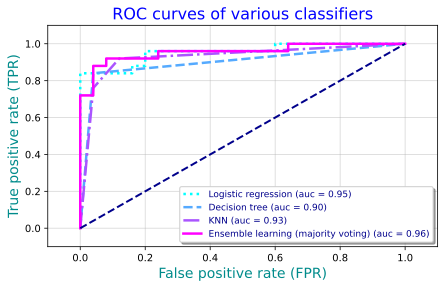

In [5]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

plt.figure(figsize=(7, 4))
plt.title("ROC curves of various classifiers", fontsize=16, color='blue')
# instead of the colors in the book, which are colors = ['black', 'orange', 'blue', 'green']
# I will use the "cool" cmap, because it yields nicer colors
cmap = plt.get_cmap("cool")
colors = [cmap(i / 3) for i in range(4)]
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
    # stores the probabilities of belonging to the positive class (class 1) for each element of X_test
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    # 'fpr', 'tpr', and 'thresholds' are the outputs of the ROC curve computation; they are arrays of
    # the same lengths, 'fpr' and 'tpr' being the false positive rates and true positive rates
    # computed at different threshold values, these values being stored in 'thresholds'
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
    # computes the AUC using the trapezoidal method
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label=f'{label} (auc = {roc_auc:.2f})', linewidth=2.5)
plt.legend(loc='lower right', fancybox=True, shadow=True, fontsize=9, labelcolor='darkblue')
plt.plot([0, 1], [0, 1], linestyle='--', color='darkblue', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
# adds a grid to the plot with an opacity of 0.5
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)', fontsize=14, color='darkcyan')
plt.ylabel('True positive rate (TPR)', fontsize=14, color='darkcyan')
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        We observe that, once again, the ensemble classifier performs best.<br>$\quad$
        Now, let's plot the decision boundaries of all four classifiers  :

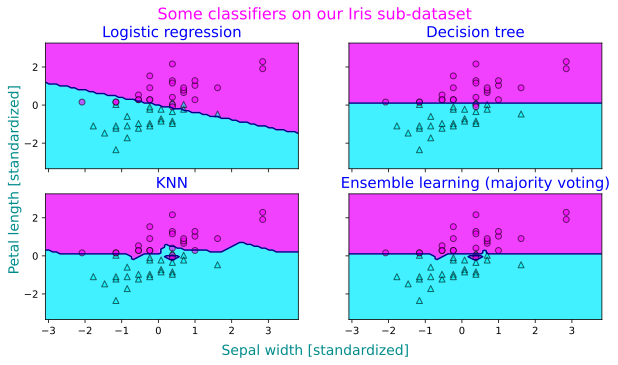

In [6]:
# 'product' computes the cartesian product
from itertools import product

# standardizes the features of the training dataset (removing the mean and scaling to unit variance)
X_train_std = StandardScaler().fit_transform(X_train)
# computes the minimum value of the first feature of the standardized training dataset, subtracts 1,
# and assigns it to x_min.
x_min = X_train_std[:, 0].min() - 1
x_max = X_train_std[:, 0].max() + 1
y_min = X_train_std[:, 1].min() - 1
y_max = X_train_std[:, 1].max() + 1
# 'np.arange(x_min, x_max, 0.1)' generates an array of values starting from x_min, up to (but not
# including) x_max, with an even step size of 0.1'; 'np.arange(y_min, y_max, 0.1)' is similar
# 'np.meshgrid(...)' takes these two 1D arrays and returns two 2D arrays representing the x and y
# coordinates of all the points in a grid. The resulting xx and yy arrays hold the x and y coordinates,
# respectively, of each point in the grid. 
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
# creates a 2x2 grid of subplots which share the 'x' and 'y' axes; 'f' is the figure, while 'axarr' is
# the array of subplots, 'axarr[i,j]' being the subplot at row 'i' and column 'j'
fig, axarr = plt.subplots(nrows=2, ncols=2, sharex='col', sharey='row', figsize=(10, 5))
# idx can be (0,0), (0,1), (1,0) or (1,1); it references the location of the subplot; each subplot
# corresponds to a particular classifier; we build one subplot at a time
for idx, clf, tt in zip(product([0, 1], [0, 1]), [pipe1, clf2, pipe3, mv_clf], clf_labels):
    # fits each classifier
    clf.fit(X_train_std, y_train)
    # The 'ravel()' function flattens multi-dimensional arrays into a one-dimensional array by
    # iterating over the elements of the first row, then the second row, and so on. Then 'np.c_[]'
    # concatenates these sets of coordinates column-wise. At last 'clf.predict()' predicts the class
    # labels for each point in the mesh grid; the points are predicted row by row, starting from the
    # top-left corner and proceeding row by row until the bottom-right corner of the mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # reshapes the 1D array Z back into the shape of the mesh grid (xx.shape), so that it matches the
    # original grid dimensions; note that xx.shape = yy.shape
    Z = Z.reshape(xx.shape)
    # 'contourf(xx, yy, Z, alpha=0.3)' separates the regions where the predicted classes are the same
    # and fills each with a different color (the "f" in 'contourf' means "filled")
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, cmap="cool", alpha=0.8)
    # I add a contour, so the decision boundary between the regions appears more clearly
    axarr[idx[0], idx[1]].contour(xx, yy, Z, levels=[0.5], colors="darkblue")
    # plots the instances of class 0 of the training dataset; the abscissa (resp. ordinate) of an
    # instance is its value for the first (resp. second) feature; it is colored cyan and marked with
    # triangles pointing upwards of size 50 dots by 50 dots (so its size depends on the DPI)
    axarr[idx[0], idx[1]].scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], marker='^',
                                  color=cmap(0), alpha=0.6, edgecolor='black')
    # plots the instances of class 1 (color: magenta; shape: disks)
    axarr[idx[0], idx[1]].scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], marker='o',
                                  color=cmap(0.999), alpha=0.6, edgecolor='black')
    axarr[idx[0], idx[1]].set_title(tt, fontsize=15, color='blue')
fig.suptitle("Some classifiers on our Iris sub-dataset", fontsize=16, color='magenta')
# adds text to the plot at coordinates (-3.5, -5) with the specified content, alignment, and font size
# here the text represents the label for the x-axis, indicating the standardized sepal width.
plt.text(-4, -5, s='Sepal width [standardized]', ha='center', va='center', fontsize=14, color='darkcyan')
# same for the y-axis, with a 90° rotation
plt.text(-12.2, 4, s='Petal length [standardized]', ha='center', va='center', rotation=90, fontsize=14,
         color='darkcyan')
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        As expected, the decision regions of the ensemble classifier seem to be a hybrid of the decision regions from the individual classifiers.<br>$\quad$
        Before we tune the individual classifier’s parameters for ensemble classification, let’s try the <font color='green'>get_params</font> method to see all that it returns when applied to our <font color='green'>VotingClassifier</font> :

In [7]:
print(MB, mv_clf.get_params())

 {'estimators': [('pipe1', Pipeline(steps=[('sc', StandardScaler()),
                ['clf', LogisticRegression(C=0.001, random_state=1)]])), ('clf2', DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)), ('pipe3', Pipeline(steps=[('sc', StandardScaler()),
                ['clf', KNeighborsClassifier(n_neighbors=2)]]))], 'flatten_transform': True, 'n_jobs': None, 'verbose': False, 'voting': 'soft', 'weights': None, 'pipe1': Pipeline(steps=[('sc', StandardScaler()),
                ['clf', LogisticRegression(C=0.001, random_state=1)]]), 'clf2': DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0), 'pipe3': Pipeline(steps=[('sc', StandardScaler()),
                ['clf', KNeighborsClassifier(n_neighbors=2)]]), 'pipe1__memory': None, 'pipe1__steps': [('sc', StandardScaler()), ['clf', LogisticRegression(C=0.001, random_state=1)]], 'pipe1__verbose': False, 'pipe1__sc': StandardScaler(), 'pipe1__clf': LogisticRegression(C=0.001, random_state=1), 'pip

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Thus, <font color='darkcyan'>mv_clf</font><font color='green'>.get_params</font> returns all the hyperparameter values of the three base learners composing <font color='darkcyan'>mv_clf</font>; in particular we retrieve <font color='green'>$C=0.001$</font> for the logistic regression, a depth of $1$ for the decision tree, and $k\!=\!2$ neighbors for the knn.<br>$\quad$
        Let's try some other hyperparameters' values, using <font color='green'>scikit-learn</font>'s <font color='green'>GridSearchCV</font> (see part 6, "4a. Grid search") in order to check if we can improve on these.

In [8]:
from sklearn.model_selection import GridSearchCV

# the hyperparameter values that we want to try
params = {'pipe1__clf__C': [0.0001, 0.001, 0.1, 100.0], 'clf2__max_depth': [1, 2],
          'pipe3__clf__n_neighbors': [1, 2]}
# the values are used to look for the best tuning possible of the ensemble estimator 'mv_clf',
# according to the ROC AUC obtained via a 10-fold cross validation
grid = GridSearchCV(estimator=mv_clf, param_grid=params, cv=10, scoring='roc_auc')
grid.fit(X_train, y_train)
# print the means, the standard deviations, and the corresponding hyperparameters' values
for mean_score, std_dev, params in zip(grid.cv_results_['mean_test_score'],
                                    grid.cv_results_['std_test_score'], grid.cv_results_['params']):
    print(BB, params, MB, round(mean_score, 3), "+/-", round(std_dev, 2))

 {'clf2__max_depth': 1, 'pipe1__clf__C': 0.0001, 'pipe3__clf__n_neighbors': 1}  0.983 +/- 0.05
 {'clf2__max_depth': 1, 'pipe1__clf__C': 0.0001, 'pipe3__clf__n_neighbors': 2}  0.967 +/- 0.1
 {'clf2__max_depth': 1, 'pipe1__clf__C': 0.001, 'pipe3__clf__n_neighbors': 1}  0.983 +/- 0.05
 {'clf2__max_depth': 1, 'pipe1__clf__C': 0.001, 'pipe3__clf__n_neighbors': 2}  0.967 +/- 0.1
 {'clf2__max_depth': 1, 'pipe1__clf__C': 0.1, 'pipe3__clf__n_neighbors': 1}  0.983 +/- 0.05
 {'clf2__max_depth': 1, 'pipe1__clf__C': 0.1, 'pipe3__clf__n_neighbors': 2}  0.967 +/- 0.1
 {'clf2__max_depth': 1, 'pipe1__clf__C': 100.0, 'pipe3__clf__n_neighbors': 1}  0.967 +/- 0.1
 {'clf2__max_depth': 1, 'pipe1__clf__C': 100.0, 'pipe3__clf__n_neighbors': 2}  0.967 +/- 0.1
 {'clf2__max_depth': 2, 'pipe1__clf__C': 0.0001, 'pipe3__clf__n_neighbors': 1}  0.983 +/- 0.05
 {'clf2__max_depth': 2, 'pipe1__clf__C': 0.0001, 'pipe3__clf__n_neighbors': 2}  0.967 +/- 0.1
 {'clf2__max_depth': 2, 'pipe1__clf__C': 0.001, 'pipe3__clf__n_nei

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        We can see that in our ultra simple situation it is never better, and sometimes worse, to use a depth of $2$ instead of $1$ for the decision tree and $2$ neighbors instead of $1$ for the knn. Also the best results are obtained when the logistic regression has a hyperparameter <font color='green'>C</font> of $0.0001$, $0.001$ or $0.1$, but not $100$.

<a id="2"></a><br><br><br><div style="font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    <h4 style="margin: 0 0 .5rem 2rem; font-size: 18px; font-weight: 800"><font color='darkpink'>2. ENSEMBLE LEARNING WITH BAGGING</font></h4>$\quad$
        As already explained in part 3, "4d. Random forests", we can use <font color='darkpink'>bagging</font> when we want to train many simple predictors (rather than a "perfect" predictor which may lead to overfitting). Instead of using all $m$ instances in our training dataset, <font color='darkpink'>bagging</font> consists in using for each predictor still $m$ instances but randomly chosen with replacement.<br>$\quad$
        These individual datasets are called <font color='darkpink'>bagging round $1$</font>, <font color='darkpink'>bagging round $2$</font>, etc., or <font color='darkpink'>bootstrap sample $1$</font>, <font color='darkpink'>bootstrap sample $2$</font>, etc. Each bootstrap sample generates a predictor, which is our initial predictor but trained on the bootstrap sample. The instances that have not been selected are called the <font color = 'darkpink'>out-of-bag (oob) instances</font>.<br>$\quad$
        Suppose our problem is a classification problem with $k$ classes. When we want to estimate the probability that a training instance $x$ belongs to the class $i$, we first select the predictors that do not have $x$ in their bootstrap sample, and then we compute the mean of the probabilities that $x$ belongs to class $i$ according to these predictors; or, if they only return a predicted class for $x$ (eg they are decision trees), then the predictions are combined using majority voting.<br>$\quad$
        The bootstrap samples of two different simple predictors will most likely be different, reducing overfitting. Also, in average, a proportion of $\left(\frac{m-1}{m}\right)^m$ will not be in a given bootstrap sample; $\left(\frac{m-1}{m}\right)^m$ grows with $m$ and converges towards $e^{-1}$ ($\simeq 36.8\%$); for example for $m\!=\!100\,$ the probability that an instance will not be chosen in a bootsrap sample is already $36.6\%$. Thus a bootstrap sample will be composed of roughly two thirds of all the training instances (some repeated). And the probability that $x$ belongs to class $i$ according to our ensemble method will be computed as a mean of the results returned by roughly one third of its base learners.<br><br>$\quad$
        A classifier built on the model described here is called a <font color = 'darkpink'>bagging classifier</font>. They are implemented in <font color='green'>scikit-learn</font>, in the <font color='green'>ensemble</font> module, under the name <font color='green'>BaggingClassifier</font> (see below).<br>$\quad$
        In order to estimate the accuracy of a bagging classifier, we introduce the function which to any training instance $x$ associates its predicted class. This function is called the <font color = 'purple'>out-of-bag (oob) decision function</font>. We can compare the outcomes of the oob decision function with the true classes; the rate of right predictions is called the <font color = 'purple'>out-of-bag (oob) score</font>; this is not to be confused with the accuracy score, since it only exists on the training dataset, and on it the predictions taken into account to compute the accuracy score are not the same than the predictions taken into account to compute the oob score (for the accuracy score a prediction for an instance will be right iff the mean of the predictions made by all the individual classifiers is right, whereas for the oob score only the classifiers for which the instance is out-of-bag do count).<br><br>
        <p style="margin: 0 0 0 2rem; font-size: 15px; font-weight: 600"><font color='purple'>$\quad$Notes :</font></p> $\quad$
        1. Random forests are bagging classifiers; they use the bagging technique, together with random features selection, using only $d$ randomly selected features for each individual decision tree (one selection per tree); usually they use $\, d = \sqrt n \,$ features. In contrast here each individual classifier will use the whole set of features; this corresponds to $\, d = n \,$.<br>$\quad$
        2. Sometimes we may use individual training datasets with less than $m$ instances; we may also choose to not replace the instances when composing these datasets, in which case the method is called <font color='darkpink'>pasting</font>.

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        To see bagging in action, let’s create a more complex classification problem than the one we used in chapter 1, instead using the wine dataset that was introduced in part 4, "3a. Partitioning a dataset between a training and a test dataset". Here, we will only consider the wine classes 2 and 3, and two features - "Alcohol" and "OD280/OD315 of diluted wines" - :

In [9]:
df_wine = pd.read_csv('wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
# drop the first class, class 1
df_wine = df_wine[df_wine['Class label'] != 1]
# selects the column labeled 'Class label' from the DataFrame 'df_wine'; retrieve the values of this
# column as a NumPy array; the result will be called 'y'
y = df_wine['Class label'].values
# similarly, this selects two columns from the DataFrame 'df_wine', retrieves their values as a NumPy
# array and assigns the result to X
X = df_wine[['Alcohol', 'OD280/OD315 of diluted wines']].values

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Next, we encode the class labels into binary format and split the dataset into $80\%$ training and $20\%$ test datasets :

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

y = LabelEncoder().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Before using <font color='green'>scikit-learn</font>'s <font color='green'>BaggingClassifier</font>, I want to introduce it together with some of its parameters. So let's consider a general instance <font color='green'>BaggingClassifier(estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, oob_score=False, n_jobs=1, random_state=None)</font> :<br>
    * <font color='green'>estimator</font> specifies the type of individual classifiers to be used; if <font color='green'>None</font>, then these base estimators will be decision trees<br>
    * <font color='green'>n_estimators</font> specifies the number of base estimators in the ensemble<br>
    * <font color='green'>max_samples</font> specifies the number of instances to use for each predictor; it is either an integer, or a float (say $f$, in which case the total number of instances to be used is $f \!\times\! m$)<br>
    * <font color='green'>max_features</font> specifies the number of features to use for each predictor; an integer or a float, it works alike <font color='green'>max_samples</font><br>
    * <font color='green'>bootstrap=True</font> (resp. <font color='green'>bootstrap=False</font>) indicates that we want to use a bagging (resp. pasting) method for selecting the individual samples<br>
    * <font color='green'>oob_score=True</font> means that we want to use out-of-bag samples to estimate the generalization error; we will then be able to recover this info by asking for the <font color='green'>oob_decision_function_</font> and/or for the <font color='green'>oob_score_</font>, which are the oob decision function and the oob score defined above<br>
    * <font color='green'>n_jobs</font> specifies the number of processors to use; <font color='green'>n_jobs=$-1$</font> means that all processors should be used<br>
    * <font color='green'>random_state</font> specifies the seed used by the random number generator

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Now, we define an unpruned decision tree, and use $500$ of them to define our bagging classifier. Then we will compare the accuracy scores obtained by the single tree and the ensemble classifier.<br>$\quad$
        I also added two <font color='green'>scikit-learn</font>'s default bagging classifiers; they use only $10$ <font color='green'>scikit-learn</font>'s default decision trees, ie unpruned trees built with the Gini impurity measure, which is simpler than the entropy used by the author's two classifiers (see part 3, "4b. Building a decision tree"). The first does not compute the oob score, while the second does, just to check that this does not change the predictions, it just gives the possibility to compute the oob score.

In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# the classifiers
tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=1)
bag = BaggingClassifier(estimator=tree, n_estimators=500, max_samples=1.0, max_features=1.0,
                        bootstrap=True, n_jobs=1, random_state=1)
bag1 = BaggingClassifier(n_jobs=1, random_state=1)
bag2 = BaggingClassifier(oob_score=True, n_jobs=1, random_state=1)

# array of (name of classifier, classifier)
classifiers = [
    ("Decision Tree (1 'entropy' fully frown tree)", tree),
    ("Bagging (500 'entropy' trees)", bag),
    ("Default Bagging (10 'gini' trees)", bag1),
    ("Default Bagging with oob_score (10 'gini' trees)", bag2)]

# Iterate through classifiers
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(BB + "\n", clf_name + " :")
    if clf == bag2: print(GB + "oob score : " + MB, round(clf.oob_score_, 3))
    print(GB + "training accuracy :" + MB, round(train_accuracy, 3))
    print(GB + "test accuracy :" + MB, round(test_accuracy, 3))


 Decision Tree (1 'entropy' fully frown tree) :
training accuracy : 1.0
test accuracy : 0.833

 Bagging (500 'entropy' trees) :
training accuracy : 1.0
test accuracy : 0.917

 Default Bagging (10 'gini' trees) :
training accuracy : 0.979
test accuracy : 0.917

 Default Bagging with oob_score (10 'gini' trees) :
oob score :  0.905
training accuracy : 0.979
test accuracy : 0.917


<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        We can see that the training accuracy was excellent in all cases; a little better for the classifiers using the entropy impurity measure. Also the oob score is less than the accuracy score (this was to be expected since for any instance the oob score only takes into account the predictions made by the classifiers which do not have this instance in their bootstrap samples, which is more difficult than making a prediction on an instance when we know which class it belongs to 😉).<br>$\quad$
        As for the generalization to the test dataset, the bagging classifiers were all better than the single decision tree. But it does not yield better results to use $500$ more complicated trees than $10$ simple trees.<br><br>$\quad$
        At last, let's compare the decision regions between the decision tree and the bagging classifiers (I have simply adapted the code in cell 6) :

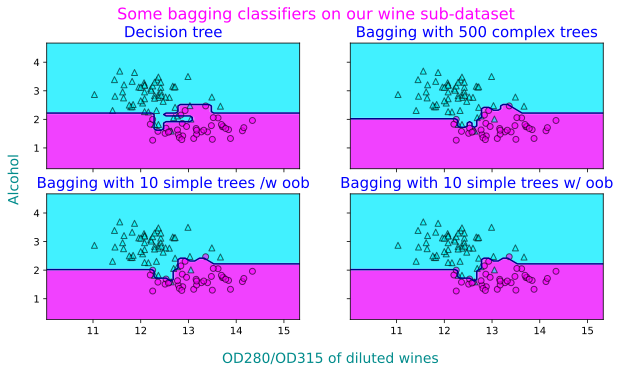

In [12]:
x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
fig, axarr = plt.subplots(nrows=2, ncols=2, sharex='col', sharey='row', figsize=(10, 5))
clf_bag_labels = ["Decision tree", "Bagging with 500 complex trees",
                  "Bagging with 10 simple trees /w oob", "Bagging with 10 simple trees w/ oob"]
for idx, clf, tt in zip(product([0, 1], [0, 1]), [tree, bag, bag1, bag2], clf_bag_labels):
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, cmap="cool", alpha=0.8)
    axarr[idx[0], idx[1]].contour(xx, yy, Z, levels=[0.5], colors="darkblue")
    axarr[idx[0], idx[1]].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], marker='^',
                                  color=cmap(0), alpha=0.6, edgecolor='black')
    axarr[idx[0], idx[1]].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], marker='o',
                                  color=cmap(0.999), alpha=0.6, edgecolor='black')
    axarr[idx[0], idx[1]].set_title(tt, fontsize=15, color='blue')
fig.suptitle("Some bagging classifiers on our wine sub-dataset", fontsize=16, color='magenta')
fig.text(0.52, 0, 'OD280/OD315 of diluted wines', ha='center', va='center', fontsize=14, color='darkcyan')
fig.text(0.08, 0.5, 'Alcohol', ha='center', va='center', fontsize=14, rotation=90, color='darkcyan')
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        The decision boundaries are smoother for the bagging classifiers than for the single tree, indicating less overfitting. They are exactly the same for the bagging classifiers, with or without oob 😊.<br><br>$\quad$
        We only looked at a very simple bagging example in this section. In practice, more complex classification tasks and a dataset’s high dimensionality can easily lead to overfitting in single decision trees, and this is where the bagging algorithm can really play to its strengths. Finally, we must note that the bagging algorithm can be an effective approach to reducing the variance of a model. However, bagging is ineffective in reducing model bias, that is, models that are too simple to capture the trends in the data well. This is why we want to perform bagging on an ensemble of classifiers with low bias, for example, unpruned decision trees.

<a id="3"></a><br><br><br><div style="font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    <h4 style="margin: 0 0 .5rem 2rem; font-size: 18px; font-weight: 800"><font color='darkpink'>3. ADAPTIVE BOOSTING (ADABOOST)</font></h4>
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>3a. The AdaBoost's strategy</font><a id="3a"></a></p>$\quad$
        Here, I will only consider a binary classification task, with classes denoted by $-1$ and $1$.<br>$\quad$
        We still call <font color='darkpink'>weak learner</font> or <font color='darkpink'>base learner</font> any simple classifier, whose accuracy is at least slightly better than random guessing; typically it will be a decision tree of depth $1$ (which is the default on <font color='green'>scikit-learn</font>).<br>$\quad$
        We call <font color='darkpink'>boosting</font> any iterative algorithm based on weak learners with the goal to build a strong estimator; at each round a new weak learner is introduced to try and improve on the estimator.<br>$\quad$
        With <font color='darkpink'>AdaBoost</font>, we use multiple copies of the same weak learner, but they are trained with different cost functions. We first train a weak learner, $L_1$, on the training dataset; if it has perfect accuracy, we stop here and $L_1$ will be our final classifier; having perfect accuracy in our context means that to each instance $x^{(i)}$ of the training dataset, $L_1(x^{(i)})\,$ is a number which is negative if the true label of $x^{(i)}$ is $y^{(i)}=-1$, and positive if $y^{(i)}=1$. Usually, $L_1$ does not have perfect accuracy, and we will want to improve our predictor by adding a new weak learner, $L_2$, and a coefficient, $\alpha_2$, so that our new predictor will be $P_2 \,=\, L_1 + \alpha_2 L_2$. If $P_2$ has perfect accuracy, then it will be our final classifier, otherwise we will add a new weak learner, $L_3$, and a new coefficient, $\alpha_3$. And so on. We set a maximum number of weak learners to use in order to control the length of this building process; on <font color='green'>scikit-learn</font> the maximum number of weak learners to use is called <font color='green'>n_estimators</font>, and its default value is $50$. Here, I will denote by $ne$ the maximum number of estimators to use, and by $f$ the number of estimators really used, which is less than $ne$ iff we reach a perfect predictor before using our $ne$ weak learners; at step $k=1,\cdots,f$ our predictor is<br><font color = darkpink>
        $$P_k \;=\; \sum_{j=1}^k \, \alpha_j \, L_j \qquad (3)$$<font color = darkblue>
    where $\alpha_1=1$, so $P_1$ is $L_1$.<br>$\quad$
        If $P_k$ has perfect accuracy then we stop our search and our final predictor is $P_f = P_k$. Otherwise, knowing everything up to the $k$-th step, how do we build $P_{k+1}$, ie which cost function will we use for $L_{k+1}$, and what will be the value of $\alpha_{k+1}$ ? The idea is to train a new weak learner $L_{k+1}$ with a cost function which will give more weight to the instances that are wrongly predicted by $L_k$ and less weight to those that have been correctly predicted by $L_k$; thus, $L_{k+1}$ will try and correct the mistakes of its predecessor.<br><br>$\quad$
        Before being more general and precise, let's see this idea in action in a simple case with the illustration provided in the book :

<figure style="text-align: center;">
    <img src="7.1. The concept of AdaBoost.png" alt="Figure showing four diagrams on a 2 by 2 grid with decision boundaries to separate two classes represented by blue circles and orange triangles displayed according to two parameters, x_1 and x_2. These diagrams are numbered : the first two (1 and 2) are at the top, and the last two (3 and 4) are at the bottom of the grid. Their descriptions follow below." width="350" />
    <figcaption style="margin-top: .5rem; font-weight: bold; color: purple">The concept of AdaBoost</figcaption>
</figure>

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        To walk through the AdaBoost illustration step by step, we will start with subfigure 1, which represents a training dataset for binary classification where all training examples are assigned equal weights. Based on this training dataset, we train a decision stump (shown as a dashed line) that tries to classify the examples of the two classes (triangles and circles).<br>$\quad$
        For the next round (subfigure 2), we assign a larger weight to the two previously misclassified examples (circles). Furthermore, we lower the weight of the correctly classified examples. The next decision stump will now be more focused on the training examples that have the largest weights—the training examples that are supposedly hard to classify.<br>$\quad$
        The weak learner shown in subfigure 2 misclassifies three instances from the circle class, which are then assigned a larger weight, as shown in subfigure 3.<br>$\quad$
        Assuming that our AdaBoost ensemble only consists of three rounds of boosting, we then combine
the three weak learners trained on different reweighted training subsets by a weighted majority vote,
as shown in subfigure 4.

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Now that we have a better idea of what we want to achieve, let's generalize the Adaboost strategy rigorously.<br>$\quad$
        The Adaboost strategy is an induction. At round $k$, we have a set of strictly positive numbers $\{w^{(k)}_i; \; i=1, \cdots, m\}$, called the <font color = 'darkpink'>instance weights at round $k$</font>. They will be defined by induction, starting with<font color = 'darkpink'>
        $$w_1^{(1)} \; = \; w_2^{(1)} \;=\; \cdots \;=\; w_m^{(1)} \;=\; \frac{1}{m} \qquad (4)$$</font><br>$\quad$
        These instance weights allow us to define the cost function $J_k$ over any predictor $L$ :<br><font color = 'darkpink'>
        $$J_k(L) \;=\; \sum_{i=1}^{m} \: w_i^{(k)} \, \times \: 1_{\{L(x^{(i)}) \neq y^{(i)} \}} \qquad (5)$$</font>
    where $y^{(i)}$ is the true class of $x^{(i)}$.<br>$\quad$
        We want $L_k$ to be the weak learner trained on the training dataset which minimizes $J_k$. It is also the weak learner which minimizes the <font color = 'purple'>weighted error rate at round $k$</font><br>
        $$r_k \;=\; \frac{J_k(L_k)}{\sum_{i=1}^{m} w_i^{(k)}} \; = \; \frac{\sum_{i=1}^{m} \: w_i^{(k)} \, \times \: 1_{\{L_k(x^{(i)}) \neq y^{(i)} \}}}{\sum_{i=1}^{m} w_i^{(k)}} \qquad (6)$$</font><br>$\quad$
        (in our case the denominators here are equal to $1$; I've kept them for a reason explained in the note). Since the weights are strictly positive numbers (see below), $r_k \in [0,1]$. Moreover $r_k = 0\,$ would mean that $L_k$ is a perfect predictor, and we would stop at round $k$; while $r_k=1$ would mean that $L_k$ has all its predictions wrong. Note that if $r_k>\frac{1}{2}$, then $L'_k := -L_k$ would be a better predictor, with a weighted error rate $r'_k = 1\!-\!r_k$, because then<br>
        $$1_{\{L'_k(x^{(i)}) \neq y^{(i)} \}} \;=\; 1 - 1_{\{L_k(x^{(i)}) \neq y^{(i)} \}}$$
        so, in fact, we know that $r_k \in [0,\frac{1}{2}[$ (since we suppose that our weak learners do better than random guessing, and since $r_k = \frac{1}{2}$ can be achieved by a random predictor, we will get $r_k<\frac{1}{2}$).<br>$\quad$
        Consequently, if $r_k=0$, we have found the perfect predictor and we stop the induction here; otherwise, we define the <font color='darkpink'>predictor weight<br>
        $$\alpha_k \;=\; \eta \, . \: \ln \frac{1-r_k}{r_k} \qquad (7)$$</font>
    where $\eta$ is a strictly positive number called the <font color = darkpink>learning rate</font> (it is equal to $\frac{1}{2}$ in the original AdaBoost method, but $1$ is its default value in <font color='green'>scikit-learn</font>).<br>
    Since $r_k \in ]0,\frac{1}{2}[$, we have $\alpha_k>0$. Knowing $\alpha_k$, Adaboost defines the instance weights at round $(k+1)$ in two steps, by first defining<br><font color = 'darkpink'>
        $$w_i^{(k+1)} \;=\; w_i^{(k)} \, \times \, \exp\left[\, - \alpha_k . y^{(i)} . L_k(x^{(i)}) \right] \qquad (8)$$</font>
    which are strictly positive numbers by induction (since the weights are all equal to $\frac{1}{m}$ at round $1$), and then normalizing these quantities to ensure stability as the algorithm progresses :<br><font color = 'darkpink'>
        $$w_i^{(k+1)} \;:=\; \frac{w_i^{(k+1)}}{\sum_{j=1}^{m} w_j^{(k+1)}} \qquad (8)'$$</font>$\quad$
        Note that with the first step, the instance weights $\,w_i^{(k+1)}\,$ are augmented iff their associated instances were wrongly predicted by $L_k$, and diminished if they were correctly predicted; after normalization, the weights corresponding to the wrong predictions will still be multiplied by a greater coefficient than the ones that correspond to correct predictions. In this sense, we can say that $L_{k+1}$ will try and correct the errors of $L_k$.<br>
    Also note that, even after normalization, the weights remain strictly positive.<br>$\quad$
        Knowing the instance weights at round $k\!+\!1$, we can loop again, define the cost $J_{k+1}$, train our weak learner $L_{k+1}$,...<br><br>$\quad$
        Once all our $f$ weak learners have been trained, any instance $x^{(i)}$ will be predicted to be in the class of the same sign as<br><p style="margin: 0 0 .5rem 0"></p><font color = 'darkpink'>
        $$P_f\left(x^{(i)}\right) \;=\; \sum_{k=1}^{f} \, \alpha_k \, L_k\left(x^{(i)}\right) \;=\; \sum_{k=1}^{f} \, \alpha_k \, \left[1_{\{L_k(x^{(i)}) = 1 \}} - 1_{\{L_k(x^{(i)}) = -1 \}}\right] \qquad (9)$$</font>
    Thus, <font color = 'purple'>$x^{(i)}$ will be predicted as positive iff the sum of the predictor weights of the weak learners predicting it is positive is larger than the sum of the predictor weights of those predicting it is negative</font>.<br><br>
        <p style="margin: 0 0 0 2rem; font-size: 15px; font-weight: 600"><font color='purple'>$\quad$Note :</font></p> $\quad$
        Some texts do not normalize the instance weights at each round (ie use $(8)$ but not $(8)'$); and some texts use another formula than $(8)$ (eg "Hands on Machine Learning $[\cdots$]" by A. Géron), although their formula will still augment the weights corresponding to the wrong predictions comparatively more than the weights corresponding to the right predictions. All texts use all the other formulae presented here, including equation $(6)$ with its denominators; in our case the denominators in $(6)$ are equal to $1$, and the weighted error rate at round $k$ is the cost of the best weak learner (ie $r_k = J_k(L_k)$). I followed <font color='green'>scikit-learn</font> (and S. Raschka in our main book).

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>3b. Applying AdaBoost with scikit-learn</font><a id="3b"></a></p>$\quad$
        Inside its <font color='green'>ensemble</font> module, <font color='green'>scikit-learn</font> proposes the class <font color='green'>AdaBoostClassifier(estimator=None, n_estimators=50, learning_rate=1.0, algorithm='deprecated', random_state=None)</font>, where :<br>
    * <font color='green'>estimator</font> specifies the base estimator from which the boosted ensemble is built; if <font color='green'>None</font>, then the base estimator is the <font color='green'>DecisionTreeClassifier</font> initialized with <font color='green'>max_depth=1</font><br>
    * <font color='green'>n_estimators</font> specifies the maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped earlier<br>
    * <font color='green'>learning_rate</font> specifies the learning rate (see (7))<br>
    * <font color='green'>algorithm='deprecated'</font> specified the algorithm to follow; 'SAMME.R' was the default but it is deprecated since <font color='green'>scikit-learn 1.6</font>, and 'SAMME' is now the only option, so the <font color='green'>algorithm</font> parameter has been removed<br>
    * <font color='green'>random_state</font> specifies the seed used by the random number generator

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Let’s now train an AdaBoost ensemble classifier via <font color='green'>scikit-learn</font>. We will use the same wine subset that we used in the previous section to train the bagging meta-classifier.<br>$\quad$
        The author introduces a decision tree with <font color='green'>max_depth=1</font>, trained with the entropy impurity measure, and an AdaBoost classifier using $500$ of these trees as weak learners. The AdaBoost classifier performs better, both on the training dataset, where it gets perfect accuracy, and on the test dataset.<br>$\quad$
        I added <font color='green'>scikit-learn</font>'s default AdaBoost classifier, which only runs $50$ of simpler trees (still with <font color='green'>max_depth=1</font> but trained with the gini impurity measure), and the results were exactly the same as the author's AdaBoost classifier. And an AdaBoost classifier with only $3$ of the simpler trees; its result on the training dataset is not perfect, with an accuracy of $93.7\%$, but the same generalization performance on the test dataset, ie an accuracy of $91.7\%$. I surmise, this is because the data points are rather easy to separate well but very difficult to separate excellently (see the decision regions below). I have added an example on a more meaningful dataset in the appendix ("Appendix - AdaBoost and Gradient Boosting revisited"). <br>
    I also added a single SVM (<font color='green'>SVC(kernel='rbf', gamma=30, C=100, random_state=1)</font>), which performs equally well on its own (accuracy scores $100\%$ and $91.7\%$ on the training and test datasets respectively). Using $500$ of them within an AdaBoost classifier would not improve on these results, in fact it will even yield worse accuracy on the training dataset than a single SVM. The best results are obtained with the author's Adaboost with $500$ entropy trees.<br>$\quad$
        Overall, the results are very similar to the ones obtained with the bagging classifiers (see cell 11) :

In [13]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

# the classifiers
tree = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1)
# the fitting of 'tree' will not be carried to the fitting of 'ada'
ada = AdaBoostClassifier(estimator=tree, n_estimators=500, algorithm='SAMME', random_state=1)
ada_def = AdaBoostClassifier(algorithm='SAMME', random_state=1)
ada_3 = AdaBoostClassifier(n_estimators=3, algorithm='SAMME', random_state=1)
svm = SVC(kernel='rbf', gamma=30, C=100, random_state=1)
ada_svm = AdaBoostClassifier(estimator=svm, n_estimators=500, learning_rate=0.1, algorithm='SAMME')

classifiers = [
    ("Decision Tree (1 'entropy' tree)", tree),
    ("AdaBoost (500 'entropy' trees)", ada),
    ("Default AdaBoost (50 'gini' trees)", ada_def),
    ("AdaBoost (3 'gini' trees)", ada_3),
    ("SVM (1 'rbf')", svm),
    ("AdaBoost (500 'rbf' SVM)", ada_svm)]

for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(BB + "\n", clf_name, GB + ":\ntrain accuracy :" + MB, round(train_accuracy, 3))
    print(GB + "test accuracy :" + MB, round(test_accuracy, 3))


 Decision Tree (1 'entropy' tree) :
train accuracy : 0.916
test accuracy : 0.875

 AdaBoost (500 'entropy' trees) :
train accuracy : 1.0
test accuracy : 0.917

 Default AdaBoost (50 'gini' trees) :
train accuracy : 0.979
test accuracy : 0.917

 AdaBoost (3 'gini' trees) :
train accuracy : 0.937
test accuracy : 0.917

 SVM (1 'rbf') :
train accuracy : 1.0
test accuracy : 0.917

 AdaBoost (500 'rbf' SVM) :
train accuracy : 0.989
test accuracy : 0.917


<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Lastly, let’s check what the decision regions look like (I use a code similar to the one in cell 12) :

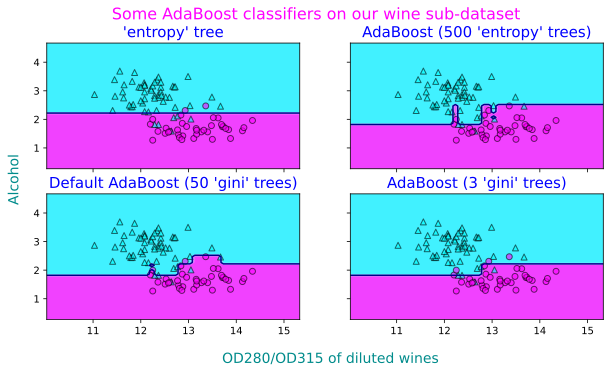

In [14]:
x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
fig, axarr = plt.subplots(nrows=2, ncols=2, sharex='col', sharey='row', figsize=(10, 5))
clf_ada_labels = ["'entropy' tree", "AdaBoost (500 'entropy' trees)",
                  "Default AdaBoost (50 'gini' trees)", "AdaBoost (3 'gini' trees)"]
for idx, clf, tt in zip(product([0, 1], [0, 1]), [tree, ada, ada_def, ada_3], clf_ada_labels):
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, cmap="cool", alpha=0.8)
    axarr[idx[0], idx[1]].contour(xx, yy, Z, levels=[0.5], colors="darkblue")
    axarr[idx[0], idx[1]].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], marker='^',
                                  color=cmap(0), alpha=0.6, edgecolor='black')
    axarr[idx[0], idx[1]].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], marker='o',
                                  color=cmap(0.999), alpha=0.6, edgecolor='black')
    axarr[idx[0], idx[1]].set_title(tt, fontsize=15, color='blue')
fig.suptitle("Some AdaBoost classifiers on our wine sub-dataset", fontsize=16, color='magenta')
fig.text(0.52, 0, 'OD280/OD315 of diluted wines', ha='center', va='center', fontsize=14, color='darkcyan')
fig.text(0.08, 0.5, 'Alcohol', ha='center', va='center', fontsize=14, rotation=90, color='darkcyan')
plt.show()

<a id="4"></a><br><br><br><div style="font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    <h4 style="margin: 0 0 .5rem 2rem; font-size: 18px; font-weight: 800"><font color='darkpink'>4. GRADIENT BOOSTING</font></h4>
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>4a. The Gradient Boosting's strategy</font><a id="4a"></a></p>$\quad$
        The weak learners of Gradient Boosting classifiers are typically simple trees; this is the only option in <font color='green'>scikit-learn</font>. Unlike AdaBoost's weak learners, whose <font color='green'>max_depth</font> is usually 1, Gradient Boosting's weak learners typically have a <font color='green'>max_depth</font> greater than 1 (the default is $3$ in <font color='green'>scikit-learn</font>).<br>$\quad$
        We only consider error functions that are the sum of individual errors made on predicted instances :<br><p style="margin: 0 0 .5rem 0"></p><font color = 'darkpink'>
        $$J \;=\; \sum_{i=1}^m \, J_i \qquad (10)$$</font>
    where each $J_i$ corresponds to the error made by the predictor on the $i$-th instance; it only uses the prediction on the $i$-th component $x^{(i)}$ of $X$ and compares it to its true value $y^{(i)}$ to give the prediction a cost.<br>$\quad$
        By default, <font color='green'>scikit-learn</font> uses the <font color='darkpink'>logistic loss function</font> (<font color='darkpink'>log_loss</font>) introduced in part 3, "2c. The logistic loss function", for binary classification tasks :<br><p style="margin: 0 0 .5rem 0"></p><font color = 'darkpink'>
        $$\text{log\_loss} \;=\; \frac{1}{m} \, \sum_{i=1}^m \, - \left[ y^{(i)} \, \ln\left(p_i\right) \,+\, {\left(1-y^{(i)}\right)} \ln\left(1-p_i\right) \right] \qquad (11)$$</font>
    where $p_i, i=1,\cdots,m$, is the predicted probability that $x^{(i)}$ belongs to class $1$; it is generalized to multiclass problems with $K$ classes :<br><p style="margin: 0 0 .5rem 0"></p><font color = 'darkpink'>
        $$\text{log\_loss} \;=\; \frac{1}{m} \, \sum_{i=1}^m \, \sum_{k=1}^K \, - \left[ y_{ik} \, \ln\left(p_{ik}\right) \right] \qquad (12)$$</font>
    where $y_{ik}=1$ if $x^{(i)}$ belongs to the $k$-th class and $0$ otherwise, while $p_{ik}$ is the predicted probability that $x^{(i)}$ belongs to the $k$-th class.<br>$\quad$
        However, Gradient Boosting applies to a wide range of problems, including both classification and regression tasks. And the cost function does not need to be the $\text{log\_loss}$; $\text{log\_loss}$ is simply the default in <font color='green'>scikit-learn</font>. For now, just think of a problem with a cost function $J$ satisfying $(10)$, which in general will be the $\text{log\_loss}$.

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        The first step of the Gradient Boosting algorithm is to train a weak learner $L_1$ on the training dataset $(X,y)$. If it has perfect accuracy then we stop immediately and our final predictor will be $P_f = L_1$; otherwise $L_1$ has a cost of<br><p style="margin: 0 0 .5rem 0"></p><font color = 'darkpink'>
        $$J\left(L_1(x)\right) \;=\; \sum_{i=1}^m \, J_i\left(L_1(x^{(i)})\right) \qquad (13)$$</font>
    where $x$ is the vector of training instances (ie $x=X$, but seen as the column vector of its instances).<br>$\quad$
        Our predictor at step $1$ is $P_1 = L_1$. Say that it is $P_l$ at step $l$; what is the strategy to try and improve upon it ? In Gradient Boosting the idea is to add a small amount $\,\epsilon_l = \left(\epsilon_l^{(i)}\right)_{i=1}^{m} \in \mathbb{R}^m\,$, so that $P_{l+1} = P_l + \epsilon_l$ will be an improvement. How can we be sure to get an improvement ? As usual, by using the Taylor formula since it says that, for $\epsilon_l$ small enough<br><font color = 'purple'>
        $$J\left( P_l(x) + \epsilon_l \right) \;\approx\; J\left(P_l(x)\right) + \epsilon_l.\nabla J\left(P_l(x)\right) \;=\; J\left(P_l(x)\right) + \sum_{i=1}^m \, \epsilon_l^{(i)} \, J_i^{'}(P_l(x)) \qquad (14)$$</font>
    where $\,P_l(x) \in \mathbb{R}^m\,$ is the predictions at step $l$ about the training instances and $J_i^{'}$ is the derivative of $J_i$, ie the derivative of $J$ with respect to its $i$-th variable $J_i^{'} = \frac{\partial J}{\partial \xi_i}$.<br>$\quad$
        Consequently if we take<br><p style="margin: 0 0 .5rem 0"></p><font color = 'darkpink'>
        $$\epsilon_l^{(i)} \;=\; - \gamma_l^{(i)} \, J_i^{'}(P_l(x)) \;=\; - \gamma_l^{(i)} \, \frac{\partial J}{\partial \xi_i}\left(P_l(x)\right) \qquad (15)$$</font><br>
    then if we choose the $\gamma_l^{(i)}$ strictly positive and small enough for the Taylor's formula to be applicable, we can be certain that<br><p style="margin: 0 0 1rem 0"></p><font color = 'purple'>
        $$J\left( P_l(x) + \epsilon_l \right) \;\leq\; J\left(P_l(x)\right) \qquad (16)$$</font><br>$\quad$
        The quantities<br><font color = 'darkpink'>
        $$r_l^{(i)} \;=\; -\, J_i^{'}(P_l(x)) \;=\; -\, \frac{\partial J}{\partial \xi_i}\left(P_l(x)\right) \qquad (17)$$</font>
    are called the <font color = 'darkpink'>pseudo-residuals</font>.<br>$\quad$
        We want our final predictor to be a linear combination of base learners, so we want to approach $\epsilon_l$ by a multiple of a base learner. We do so by training our $l$-th base learner $L_l$ on $(X, r_l)$ and by multiplying it pointwise by $\gamma_l$, because then we will have<br><font color = 'darkpink'>
        $$P_l(x) + \epsilon_l \;=\; P_l(x) + \gamma_l \odot r_l \;\approx\; P_l(x) \,+\, \gamma_l \odot L_l(x) \;\; \left(=\, P_{l+1}(x) \right) \qquad (18)$$</font>
    where the '$\odot$' represents the pointwise multiplication.

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        $(18)$ shows that, <font color = 'darkpink'>at step $l$, our weak learner $L_l$ should be trained on $(X, r_l)$</font>. Our new predictor will be $P_l(x) \,+\, \gamma_l \odot L_l(x)$, for a small enough $\gamma_l$. So now, let's try to find a good value for $\gamma_l \in \mathbb{R}^m$.<br>$\quad$
        There are two closely related methods to determine $\gamma_l$. The first that I will present here is the one that is chosen whenever possible. Note that, in <font color='green'>scikit-learn</font>, the base learners of Gradient Bosting can only be decision trees; and our first method is applicable when the base learners are decision trees, so <font color='green'>scikit-learn</font> systematically uses it (and so does our book). And the second, that I will present below, is a simplification of this method.<br>$\quad$
        The first method starts with partitioning the set of training instances into regions where they take the same values via $L_l$; if<br><p style="margin: 0 0 .5rem 0"></p><font color = 'darkpink'>
        $$\Big\{L_l\left(x^{(i)}\right),\; i=1,\cdots,m\Big\} \;=\; \Big\{\alpha_s,\; s \in \{1,\cdots,S_l\}\Big\} \qquad (19)$$</font>
    then<font color = 'purple'>
        $$L_l(x^{(i)}) \;=\; \sum_{s=1}^{S_l} \, \alpha_s \, 1_{L_l(x^{(i)})=\alpha_s} \qquad (20)$$</font>
    and<font color = 'purple'>
        $$J\left(P_l(x) \,+\, \gamma_l \odot L_l(x)\right) \;=\; \sum_{i=1}^m\, \sum_{s=1}^{S_l} \, J_i\left( P_l(x^{(i)}) \,+\, \gamma_l^{(i)} \, \alpha_s\right) \, 1_{L_l(x^{(i)})=\alpha_s} \qquad (21)$$</font><br>$\quad$
    In Gradient Boosting $\,\forall s=1,\cdots,S_l\;$ we choose all the $\gamma_l^{(i)}$ with $i$ such that $L_l(x^{(i)})=\alpha_s$ equal between themselves, and then we choose the $\gamma_l^{(s)}$ which minimizes the cost over the instances that are predicted by $L_l$ to be of value $\alpha_s$ :<p style="margin: 0 0 .5rem 0"></p><font color = 'darkpink'>
        $$\gamma_l^{(s)} \;=\; \underset{\gamma \in \mathbb{R}}{\text{argmin}}\; \sum_{i=1}^m\,  J_i\!\left( P_l(x^{(i)}) \,+\, \gamma \, \alpha_s\right) \, 1_{L_l(x^{(i)})=\alpha_s} \qquad (22)$$</font><br>$\quad$
        Then<font color = 'purple'>
        $$J\left(P_l(x) \,+\, \gamma_l \odot L_l(x)\right) \;\geq\; J\left(P_l(x) \,+\, \sum_{s=1}^{S_l} \, \gamma_l^{(s)} \, L_l(x) \, 1_{L_l(x)=\alpha_s}\right) \qquad (23)$$</font><br>
    since<br>
        $$\begin{align} J\left(P_l(x) \,+\, \sum_{s=1}^{S_l} \, \gamma_l^{(s)} \, L_l(x) \, 1_{L_l(x)=\alpha_s}\right) & \;=\; \sum_{i=1}^m\, J_i\!\left(P_l(x^{(i)}) \,+\, \sum_{t=1}^{S_l} \, \gamma_l^{(t)} \, L_l(x^{(i)}) \, 1_{L_l(x^{(i)})=\alpha_t}\right) \\& \;=\; \sum_{i=1}^m\,  \left(\sum_{s=1}^{S_l}\,  1_{L_l(x^{(i)})=\alpha_s}\right) \; J_i\!\left(P_l(x^{(i)}) \,+\, \sum_{t=1}^{S_l} \, \gamma_l^{(t)} \, L_l(x^{(i)}) \, 1_{L_l(x^{(i)})=\alpha_t}\right) \\& \;=\; \sum_{i=1}^m\, \sum_{s=1}^{S_l} \, J_i\!\left( P_l(x^{(i)}) \,+\, \gamma_l^{(s)} \, \alpha_s\right) \, 1_{L_l(x^{(i)})=\alpha_s} \\& \;\leq\; \sum_{i=1}^m\, \sum_{s=1}^{S_l} \, J_i\!\left( P_l(x^{(i)}) \,+\, \gamma_l^{(i)} \, \alpha_s\right) \, 1_{L_l(x^{(i)})=\alpha_s} \;=\; J\left(P_l(x) \,+\, \gamma_l \odot L_l(x)\right) \end{align}$$<br><br>$\quad$
        So, at step $(l\!+\!1)$, our predictor is the one of the form $(18)$ which minimizes the cost, ie<p style="margin: 0 0 .5rem 0"></p><font color = 'darkpink'>
        $$P_{l+1} \;=\; P_l \,+\, \left(\sum_{s=1}^{S_l} \, \gamma_l^{(s)} \, 1_{L_l=\alpha_s}\right)  \, L_l \qquad (24)$$</font><p style="margin: 0 0 .5rem 0"></p>$\quad$
        Note that in this method the coefficient that multiplies the base learner is a piecewise constant function; it is called the <font color = 'darkpink'>step-size</font>.<br><br>$\quad$
        The second method does not use a partition. It consists in taking all the $\gamma_l^{(i)}$ equal, and then $\gamma_l$ is the one which minimizes the total cost :<br><p style="margin: 0 0 .5rem 0"></p><font color = 'darkpink'>
        $$\gamma_l \;=\; \underset{\gamma \in \mathbb{R}}{\text{argmin}}\;\; J\!\left(P_l(x) \,+\, \gamma \, L_l(x)\right) \;=\; \underset{\gamma \in \mathbb{R}}{\text{argmin}}\;\; \sum_{i=1}^m\,  J_i\!\left( P_l(x^{(i)}) \,+\, \gamma \, L_l(x^{(i)}\right) \qquad (25)$$</font><br>$\quad$
        Then our predictor at step $(l+1)$ is<br><p style="margin: 0 0 .5rem 0"></p><font color = 'darkpink'>
        $$P_{l+1} \;=\; P_l \,+\, \gamma_l \, L_l \qquad (26)$$</font><p style="margin: 0 0 .5rem 0"></p>$\quad$
        In this second method, the step-size is a constant.<br><br>$\quad$
        We may also add a <font color = 'darkpink'>learning rate</font> $\eta$, meaning that our new predictor would be<font color = 'darkpink'>
        $$P_{l+1} \;=\; P_l \,+\, \left(\sum_{s=1}^{S_l} \, \eta \, \gamma_l^{(s)} \, 1_{L_l=\alpha_s}\right)  \, L_l \qquad (24)'$$</font>$\quad$
        or<br><font color = 'darkpink'>
        $$P_{l+1} \;=\; P_l \,+\, \eta \, \gamma_l \, L_l \qquad (26)'$$</font>
    according to the chosen method.<br>$\quad$
        And we stop this algorithm as soon as our predictor has perfect accuracy, or when a stopping criterion has been met. We will see in the next subchapter some examples of stopping criteria; but, as an ewample, we can decide to stop the algorithm after a certain number of steps (in <font color='green'>scikit-learn</font> the number of weak learners to use is, by default, $100$).

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        In order to use the method with a partition, we need our base learners to take their values in a finite set (see $(19)$). But, according to $(18)$, at step $l$, our base learners $L_l$ should be trained on $(X, r_l)$, which means that they should be able to take any (small) real values. Their targets are not classes, they are the pseudo residuals defined at $(17)$. There is a set of simple predictors that can try to predict any real values and that take only a finite number of values : the regression trees. Regression trees are the base learners of choice for Gradient Boosting, and they are the only possible learners in most libraries, including <font color='green'>scikit-learn</font>.<br>$\quad$
        Regression trees are decision trees that predict numbers. Besides the general definition of decision trees (see part 3, "4a. What is a decision tree ?"), up to now we have only met classification trees. So let's now see how a regression tree work; let's present them in our current framework, so they will be easier to explain.<br>$\quad$
        A regression tree, like a classification tree, performs the same type of operations in each one of its nodes, up to its leaves : they use a criterion based on the features to split the instances in a node into two groups. In theory we could use non-binary trees, but no libraries do that; it is already computationally demanding to try and find a good split into two groups for each node (plus the more complex the trees, the greater the risk of overfitting), so only binary trees are used. Now, how do our regression trees split a node's instances ? Like classification trees, they use a hyperplane of the feature space; more precisely, they choose the "best" hyperplane in the set $\mathcal{H}$ of hyperplanes defined by a single feature and a threshold.<br>$\quad$
        This is how $\mathcal{H}$ is built : for $j=1,\cdots,n$ collect and sort the feature values $x^{(i)}_j$ of the instances in the node; say we get $a^{(1)}_j < a^{(2)}_j < \cdots < a^{(p_j)}_j$ where $p_j$ depends on the instances in the node. And then, compute their contiguous means, which will be our thresholds : $\;h^{(k)}_j = \frac{a^{(k)}_j + a^{(k+1)}_j)}{2}\;$ for $\;k=1,\cdots, p_j\!-\!1$. We get $(p_j\!-\!1)$ splitting hyperplanes along the $j$-th axis : $\mathcal{H}^{(k)}_j = \Big\{x \in \mathbb{R}^n \:;\;\; x_j = h^{(k)}_j \Big\}$ for $\;k=1,\cdots, p_j\!-\!1$. We do this for all $j=1,\cdots,n$, and $\mathcal{H}$ is our collection of axis-aligned hyperplanes, $\mathcal{H} = \Big\{\mathcal{H}^{(k)}_j \:;\;\; j=1,\cdots,n \;\text{ and }\; k=1,\cdots, p_j \Big\}$. Any hyperplane $H$ of $\mathcal{H}$ naturally splits the instances in the node into two groups, the instances on one side of $H$, and the instances on the other side.<br>
    The "best" hyperplane among the hyperplanes in $\mathcal{H}$ is the hyperplane which minimizes the $SSE\,$ (the sum of the squared errors, which is equal to the $MSE\,$ multiplied by the cardinality of the node) $SSE(H) \;=\; \sum_{x^{(i)} \in H_1} \left(r_l^{(i)} - \mu_1 \right)^2 \,+\, \sum_{x^{(i)} \in H_2} \left(r_l^{(i)} - \mu_2 \right)^2\;\;$ where $\mu_1$ (resp. $\mu_2$) is the mean of the pseudo-residuals of the instances in one group determined by $H$ (resp. in the other group).<br>$\quad$
        Once a minimizing hyperplane has been found for the root (the set of all instances), it is split into two nodes, and the same process is done again with each node, and so on, until a stopping criterion is met. The base learner $L_l$ is then the tree that assigns to any instance the mean of the pseudo-residuals of the instances in the same leaf. This is how a regression tree is trained. We can then go to $(19)$ and continue the algorithm.

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>4b. Applying Gradient Boosting with scikit-learn</font><a id="4b"></a></p>$\quad$
        Inside its <font color='green'>ensemble</font> module, <font color='green'>scikit-learn</font> proposes the class <font color='green'>GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=3, random_state=None)</font>, where :<br>
    * <font color='green'>loss='log_loss'</font> specifies the cost function<br>
    * <font color='green'>learning_rate=0.1</font> specifies the value of the learning rate, which is $0.1$ by default; we must specify <font color='green'>learning_rate=1</font> if we do not want to use a learning rate<br>
    * <font color='green'>n_estimators=100</font> specifies the number of weak learners to use<br>
    * <font color='green'>min_samples_split=2</font> specifies the minimum number of samples required to split a node<br>
    * <font color='green'>min_samples_leaf=1</font> specifies the minimum number of samples required to be at a leaf node; a split point at any depth will only be considered if it leaves at least <font color='green'>min_samples_leaf</font> training samples in each of the left and right branches<br>
    * <font color='green'>max_depth=3</font> specifies the maximum depth of the weak learners; if None, then nodes are expanded in accordance with the two previous parameters<br>
    * <font color='green'>random_state=None</font> specifies the seed used by the random number generator

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Let’s now train a Gradient Boosting ensemble classifier via <font color='green'>scikit-learn</font>. We will use the same wine subset that we used in "2. Ensemble learning with bagging".<br>$\quad$
        The author introduces a decision tree with <font color='green'>max_depth=3</font>, trained with the entropy impurity measure. We add a Gradient Boosting classifier with $500$ <font color='green'>scikit-learn</font> default trees (the ones using the $MSE\,$, see Note 2 above). The Gradient Boosting classifier performs better on the training dataset, where it gets perfect accuracy, but not on the test dataset.<br>$\quad$
        I added <font color='green'>scikit-learn</font>'s default Gradient Boosting classifier, which only runs $100$ default (regression) trees (still with <font color='green'>max_depth=3</font>), and the results are better than the author's Gradient Boosting classifier. And a Gradient Boosting classifier with only $3$ regression trees. Strangely enough, both get the same accuracy scores, perfect accuracy on the training dataset, and a better test accuracy score than the Gradient Boosting classifier which used $500$ regression trees ($91.7\%$ vs $87.5\%$). I have added an example on a more meaningful dataset in the appendix ("Appendix - AdaBoost and Gradient Boosting revisited"). <br>$\quad$
        Overall, the results are very similar to the ones obtained with the bagging classifiers (see cell 11) or the Adaboost (see cell 13) :

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

# the classifiers
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)
# the fitting of 'tree' will not be carried to the fitting of 'gb'
gb = GradientBoostingClassifier(n_estimators=500, random_state=1)
gb_def = GradientBoostingClassifier(learning_rate=0.1, random_state=1)
gb_wlr = GradientBoostingClassifier(n_estimators=3, learning_rate=1, random_state=1)

classifiers = [
    ("Decision Tree (1 'entropy' tree of depth 3)", tree),
    ("Gradient Boosting (500 'MSE' trees)", gb),
    ("Default Gradient Boosting (100 'MSE' trees)", gb_def),
    ("Minimal Gradient Boosting (3 'MSE' trees /w learning rate)", gb_wlr)]

for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(BB + "\n", clf_name, GB + ":\ntrain accuracy :" + MB, round(train_accuracy, 3))
    print(GB + "test accuracy :" + MB, round(test_accuracy, 3))


 Decision Tree (1 'entropy' tree of depth 3) :
train accuracy : 0.926
test accuracy : 0.875

 Gradient Boosting (500 'MSE' trees) :
train accuracy : 1.0
test accuracy : 0.875

 Default Gradient Boosting (100 'MSE' trees) :
train accuracy : 1.0
test accuracy : 0.917

 Minimal Gradient Boosting (3 'MSE' trees /w learning rate) :
train accuracy : 1.0
test accuracy : 0.917


<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Lastly, let’s check what the decision regions look like (again recycling the code in cell 12) :

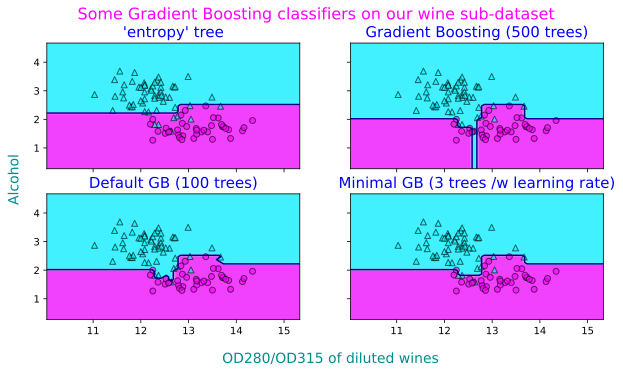

In [16]:
x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
fig, axarr = plt.subplots(nrows=2, ncols=2, sharex='col', sharey='row', figsize=(10, 5))
clf_gb_labels = ["'entropy' tree", "Gradient Boosting (500 trees)",
                  "Default GB (100 trees)", "Minimal GB (3 trees /w learning rate)"]
for idx, clf, tt in zip(product([0, 1], [0, 1]), [tree, gb, gb_def, gb_wlr], clf_gb_labels):
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, cmap="cool", alpha=0.8)
    axarr[idx[0], idx[1]].contour(xx, yy, Z, levels=[0.5], colors="darkblue")
    axarr[idx[0], idx[1]].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], marker='^',
                                  color=cmap(0), alpha=0.6, edgecolor='black')
    axarr[idx[0], idx[1]].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], marker='o',
                                  color=cmap(0.999), alpha=0.6, edgecolor='black')
    axarr[idx[0], idx[1]].set_title(tt, fontsize=15, color='blue')
fig.suptitle("Some Gradient Boosting classifiers on our wine sub-dataset", fontsize=16, color='magenta')
fig.text(0.52, 0, 'OD280/OD315 of diluted wines', ha='center', va='center', fontsize=14, color='darkcyan')
fig.text(0.08, 0.5, 'Alcohol', ha='center', va='center', fontsize=14, rotation=90, color='darkcyan')
plt.show()

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>4c. scikit-learn's HistGradientBoostingClassifier</font><a id="4c"></a></p>$\quad$
        Still inside its <font color='green'>ensemble</font> module, <font color='green'>scikit-learn</font> proposes the class <font color='green'>HistGradientBoostingClassifier(loss='log_loss', learning_rate=0.1, max_iter=100, max_depth=None, max_leaf_nodes=31, min_samples_leaf=20, max_features=1.0, tol=1e-07, random_state=None)</font>, which "is much faster than <font color='green'>GradientBoostingClassifier</font> for big datasets (n_samples >= 10 000)" according to them.<br>$\quad$
        Let's present the parameters that I did not defined in the previous subchapter for the <font color='green'>GradientBoostingClassifier</font> :<br>
    * <font color='green'>max_iter=100</font> specifies the maximum number of iterations of the boosting process. For binary classification it will be the maximum number of trees; for multiclass classification, n_classes trees per iteration are built.<br>
    * <font color='green'>max_leaf_nodes=31</font> specifies the maximum number of leaves for each tree. If None, there is no maximum limit.<br>
    * <font color='green'>max_features=1.0</font> (float) specifies the proportion of randomly chosen features in each and every node split.<br>
    * <font color='green'>tol=1e-07</font> specifies the absolute tolerance to use when comparing scores. The higher the tolerance, the more likely we are to early stop

<a id="Appendix"></a><br><br><br><div style="font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    <h4 style="margin: 0 0 .5rem 2rem; font-size: 18px; font-weight: 800"><font color='darkpink'>APPENDIX - ADABOOST AND GRADIENT BOOSTING REVISITED</font></h4>$\quad$
        On the datasets used for illustrating the AdaBoost and Gradient Boosting algorithms, an AdaBoost with $3$ decision trees of depth $1$ or a Gradient Boosting with $3$ decision trees of depth $3$ returned the best results, and it was not possible to improve on that. So here, I want to use the same codes, but with a different dataset, built via the <font color='green'>make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)</font>, from the <font color='green'>datasets</font> module of <font color='green'>scikit-learn</font> :<br>
    * <font color='green'>shuffle=True</font> specifies whether to shuffle the samples<br>
    * <font color='green'>noise=None</font> specifies the standard deviation of Gaussian noise added to the data; typically a float between $0.1$ and $0.3$<br><br>$\quad$
        We begin with Adaboost (first the accuracy scores and then the decision regions), and we end with Gradient Boosting (idem).

In [17]:
from sklearn.datasets import make_moons

# Generate make_moons dataset with noise=0.3 and 500 instances
X, y = make_moons(n_samples=500, noise=0.3, random_state=1936)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# the classifiers for AdaBoost
tree = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1)
# the fitting of 'tree' will not be carried to the fitting of 'ada'
ada = AdaBoostClassifier(estimator=tree, n_estimators=500, algorithm='SAMME')
ada_def = AdaBoostClassifier(algorithm='SAMME', random_state=1)
ada_3 = AdaBoostClassifier(n_estimators=3, algorithm='SAMME', random_state=1)
svm = SVC(kernel='rbf', gamma=30, C=1, random_state=1)
ada_svm = AdaBoostClassifier(estimator=svm, n_estimators=50, learning_rate=0.1, algorithm='SAMME')

classifiers = [
    ("Decision Tree (1 'entropy' tree)", tree),
    ("AdaBoost (500 'entropy' trees)", ada),
    ("Default AdaBoost (50 'gini' trees)", ada_def),
    ("AdaBoost (3 'gini' trees)", ada_3),
    ("SVM (1 'rbf')", svm),
    ("AdaBoost (50 'rbf' SVM)", ada_svm)]

for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(BB + "\n", clf_name, GB + ":\ntrain accuracy :" + MB, round(train_accuracy, 3))
    print(GB + "test accuracy :" + MB, round(test_accuracy, 3))


 Decision Tree (1 'entropy' tree) :
train accuracy : 0.823
test accuracy : 0.82

 AdaBoost (500 'entropy' trees) :
train accuracy : 0.98
test accuracy : 0.93

 Default AdaBoost (50 'gini' trees) :
train accuracy : 0.938
test accuracy : 0.91

 AdaBoost (3 'gini' trees) :
train accuracy : 0.912
test accuracy : 0.9

 SVM (1 'rbf') :
train accuracy : 0.95
test accuracy : 0.91

 AdaBoost (50 'rbf' SVM) :
train accuracy : 0.945
test accuracy : 0.92


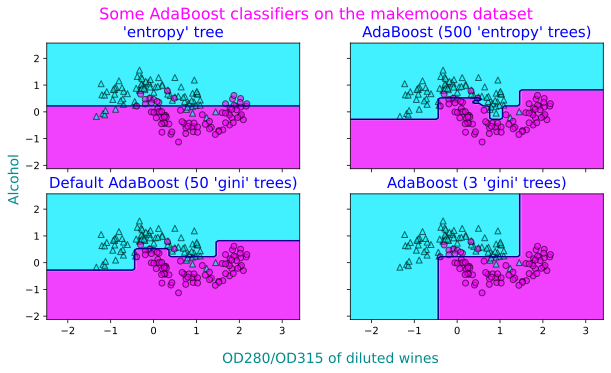

In [18]:
x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
fig, axarr = plt.subplots(nrows=2, ncols=2, sharex='col', sharey='row', figsize=(10, 5))
clf_ada_labels = ["'entropy' tree", "AdaBoost (500 'entropy' trees)",
                  "Default AdaBoost (50 'gini' trees)", "AdaBoost (3 'gini' trees)"]
for idx, clf, tt in zip(product([0, 1], [0, 1]), [tree, ada, ada_def, ada_3], clf_ada_labels):
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, cmap="cool", alpha=0.8)
    axarr[idx[0], idx[1]].contour(xx, yy, Z, levels=[0.5], colors="darkblue")
    axarr[idx[0], idx[1]].scatter(X_train[y_train==0, 0][:80], X_train[y_train==0, 1][:80], marker='^',
                                  color=cmap(0), alpha=0.6, edgecolor='black')
    axarr[idx[0], idx[1]].scatter(X_train[y_train==1, 0][:80], X_train[y_train==1, 1][:80], marker='o',
                                  color=cmap(0.999), alpha=0.6, edgecolor='black')
    axarr[idx[0], idx[1]].set_title(tt, fontsize=15, color='blue')
fig.suptitle("Some AdaBoost classifiers on the makemoons dataset", fontsize=16, color='magenta')
fig.text(0.52, 0, 'OD280/OD315 of diluted wines', ha='center', va='center', fontsize=14, color='darkcyan')
fig.text(0.08, 0.5, 'Alcohol', ha='center', va='center', fontsize=14, rotation=90, color='darkcyan')
plt.show()

In [19]:
# the classifiers
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)
# the fitting of 'tree' will not be carried to the fitting of 'ada'
gb = GradientBoostingClassifier(n_estimators=500, random_state=1)
gb_def = GradientBoostingClassifier(learning_rate=0.1, random_state=1)
gb_wlr = GradientBoostingClassifier(n_estimators=3, learning_rate=1, random_state=1)

classifiers = [
    ("Decision Tree (1 'entropy' tree of depth 3)", tree),
    ("Gradient Boosting (500 trees)", gb),
    ("Default Gradient Boosting (100 'gini' trees)", gb_def),
    ("Minimal Gradient Boosting (3 'gini' trees /w learning rate)", gb_wlr)]

for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(BB + "\n", clf_name, GB + ":\ntrain accuracy :" + MB, round(train_accuracy, 3))
    print(GB + "test accuracy :" + MB, round(test_accuracy, 3))


 Decision Tree (1 'entropy' tree of depth 3) :
train accuracy : 0.912
test accuracy : 0.9

 Gradient Boosting (500 trees) :
train accuracy : 1.0
test accuracy : 0.94

 Default Gradient Boosting (100 'gini' trees) :
train accuracy : 0.988
test accuracy : 0.94

 Minimal Gradient Boosting (3 'gini' trees /w learning rate) :
train accuracy : 0.94
test accuracy : 0.93


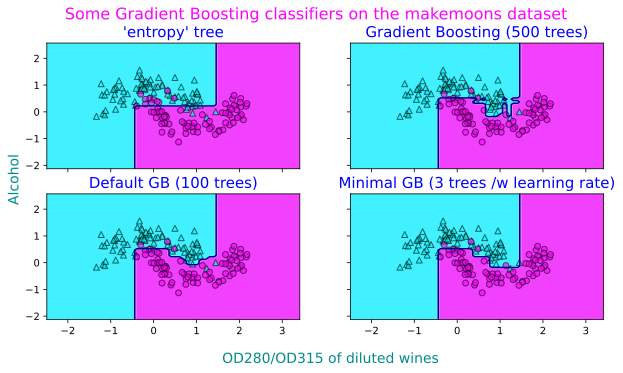

In [20]:
x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
fig, axarr = plt.subplots(nrows=2, ncols=2, sharex='col', sharey='row', figsize=(10, 5))
clf_gb_labels = ["'entropy' tree", "Gradient Boosting (500 trees)",
                  "Default GB (100 trees)", "Minimal GB (3 trees /w learning rate)"]
for idx, clf, tt in zip(product([0, 1], [0, 1]), [tree, gb, gb_def, gb_wlr], clf_gb_labels):
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, cmap="cool", alpha=0.8)
    axarr[idx[0], idx[1]].contour(xx, yy, Z, levels=[0.5], colors="darkblue")
    axarr[idx[0], idx[1]].scatter(X_train[y_train==0, 0][:80], X_train[y_train==0, 1][:80], marker='^',
                                  color=cmap(0), alpha=0.6, edgecolor='black')
    axarr[idx[0], idx[1]].scatter(X_train[y_train==1, 0][:80], X_train[y_train==1, 1][:80], marker='o',
                                  color=cmap(0.999), alpha=0.6, edgecolor='black')
    axarr[idx[0], idx[1]].set_title(tt, fontsize=15, color='blue')
fig.suptitle("Some Gradient Boosting classifiers on the makemoons dataset", fontsize=16, color='magenta')
fig.text(0.52, 0, 'OD280/OD315 of diluted wines', ha='center', va='center', fontsize=14, color='darkcyan')
fig.text(0.08, 0.5, 'Alcohol', ha='center', va='center', fontsize=14, rotation=90, color='darkcyan')
plt.show()